# Baseline Brain Alignment on Harry Potter Dataset

In [1]:
import os
import pickle
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from itertools import product
from functools import partial

In [2]:
models = ["gpt2-small", "gpt2-medium", "gpt2-large", "gpt2-xl"]
modes = ["00", "01", "10", "11"]
tmode = ["Default", "PS", "FC", "PS/FC"]
ddir = Path("../data/base_align_data")

In [3]:
r2r = lambda x : np.sign(x) * np.sqrt(np.abs(x))

In [4]:
tscores = []
mscores = []
mstderr = []
for model in models:
    mmodes = []
    mmstde = []
    for mode in modes:
        scores = pickle.load(open(ddir / f"{model}-br2-{mode}.pkl", "rb"))
        scores = np.array(scores)
        # get the standard error
        stderr = np.std(np.sqrt(np.abs(scores)), axis=(0,1)) / (scores.shape[0] * scores.shape[1])
        # average across all of the participants
        tscores.append(np.mean(r2r(scores)))
        scores = np.mean(scores, axis=(0,1))
        mmodes.append(scores)
        mmstde.append(stderr)
    mstderr.append(stderr)
    mscores.append(mmodes)

In [5]:
mscores = list(map(r2r, mscores))

## What are the effects of text/punctuation formatting on brain alignment?

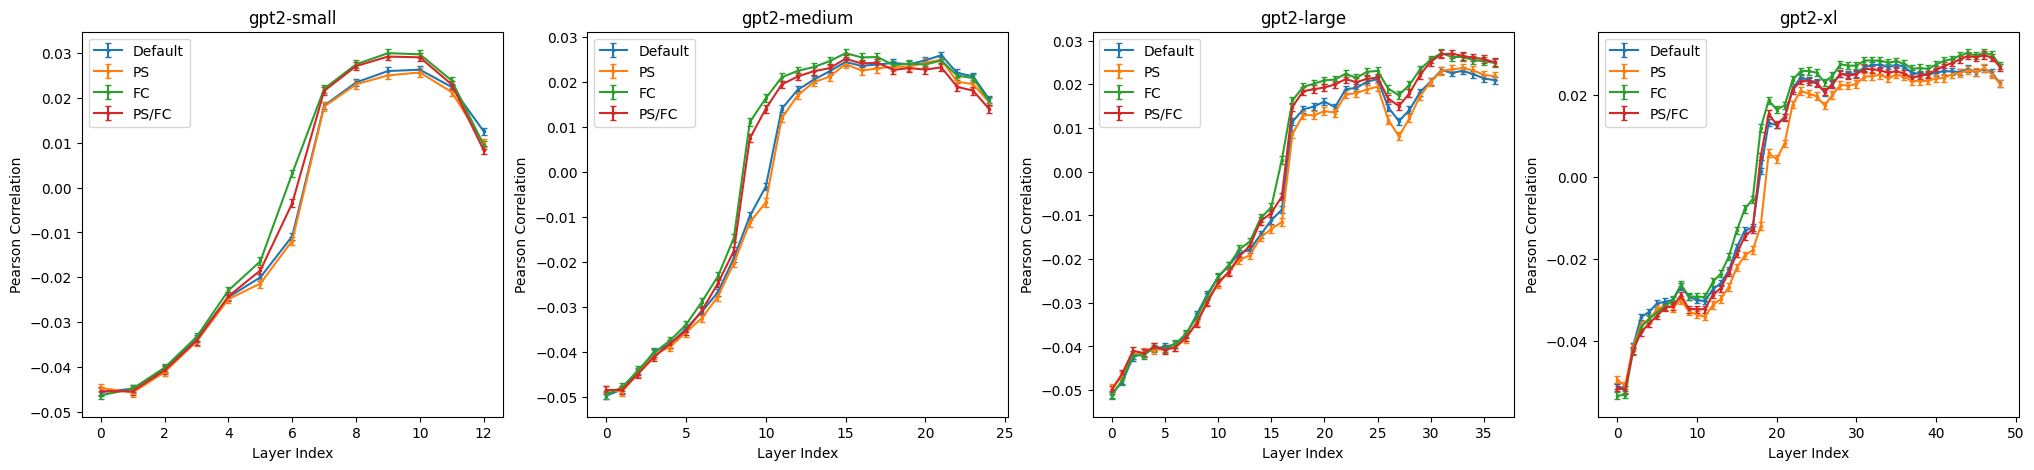

In [114]:
fig, ax = plt.subplots(1,4,figsize=(25,5))
for midx in range(len(models)):
    mname = models[midx]
    ax[midx].set_title(mname)
    for idx, s in enumerate(mscores[midx]):
        ax[midx].errorbar(range(0,s.shape[0]), s, yerr=mstderr[0][idx], label=tmode[idx], marker="s", markersize=2, capsize=2)
    ax[midx].legend()
    ax[midx].set_xlabel("Layer Index")
    ax[midx].set_ylabel("Pearson Correlation")

fig.savefig("../figures/brain_alignment_model_size.pdf")

In [21]:
for i, n in enumerate(product(models, tmode)):
    print(f"{n[0]} ({n[1]}):", tscores[i])

gpt2-small (Default): -0.0067008175520316526
gpt2-small (PS): -0.006554295671916053
gpt2-small (FC): -0.007176071612210857
gpt2-small (PS/FC): -0.006891142232593067
gpt2-medium (Default): -0.005111978684372527
gpt2-medium (PS): -0.00529384609562376
gpt2-medium (FC): -0.005137152814606001
gpt2-medium (PS/FC): -0.005645349129441609
gpt2-large (Default): -0.006475512895697422
gpt2-large (PS): -0.006875708979119766
gpt2-large (FC): -0.006212441461330908
gpt2-large (PS/FC): -0.006341279901434592
gpt2-xl (Default): -0.0017054138593681505
gpt2-xl (PS): -0.002608204246371415
gpt2-xl (FC): -0.001951354455527128
gpt2-xl (PS/FC): -0.0031121241402388114


## What are the effects of PCA-dimension on brain alignment?

In [85]:
pdims = ["10", "50", "100", "200", "300"]

In [86]:
scores = []
stders = []
for m in models:
    ts = []
    tss = []
    for mode in modes:
        ps = []
        pss = []
        for p in pdims:
            score = pickle.load(open(ddir / f"{m}-br2-{mode}-pca-{p}.pkl", "rb"))
            score = np.array(score)
            stderr = np.std(np.sqrt(np.abs(score)), axis=(0,1)) / (score.shape[0] * score.shape[1])
            pss.append(stderr)
            ps.append(np.mean(r2r(score), axis=(0,1)))
        tss.append(pss)
        ts.append(ps)
    stders.append(tss)
    scores.append(ts)

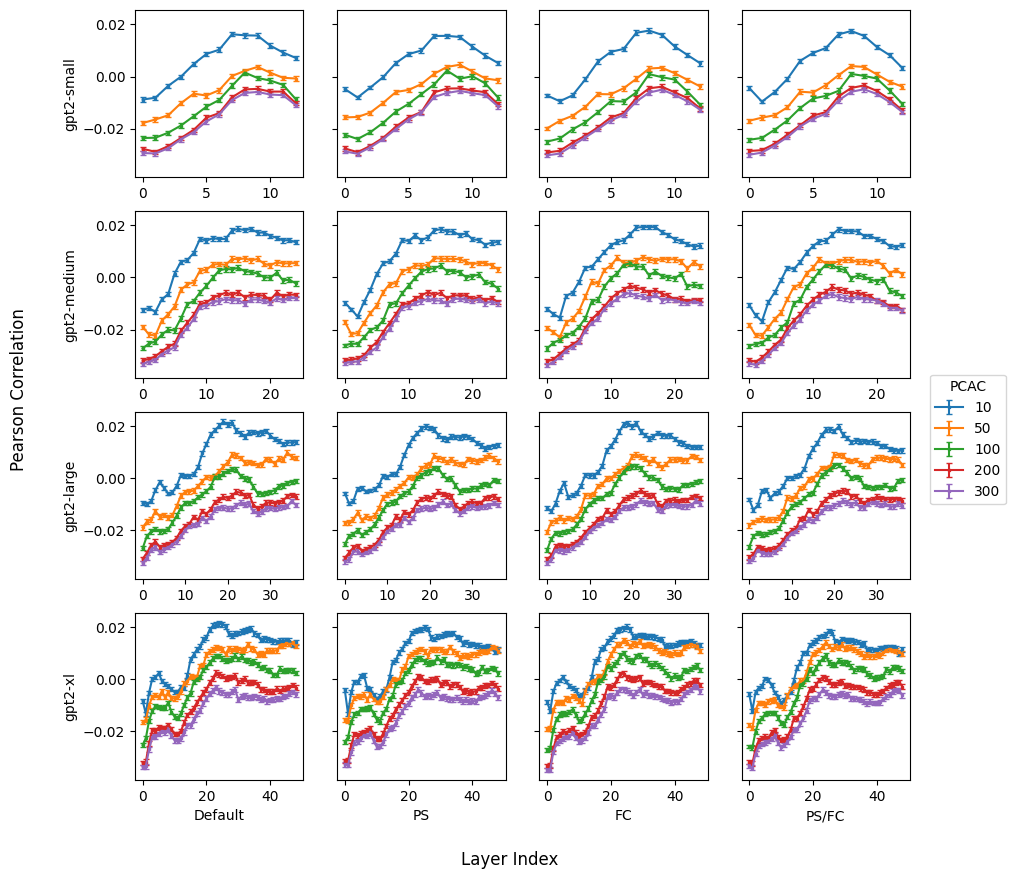

In [112]:
fig, ax = plt.subplots(len(models), len(tmode), figsize=(10,10),sharey=True)
for i, m in enumerate(models):
    for j, n in enumerate(tmode):
        for pi, p in enumerate(pdims):
            if j == 0:
                ax[i,j].set_ylabel(m)
            if i == 3:
                ax[i,j].set_xlabel(tmode[j])
            ax[i,j].errorbar(range(0,scores[i][j][pi].shape[0]), scores[i][j][pi], yerr=stders[i][j][pi], label=p, marker="s", markersize=2, capsize=2)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label, title="PCAC", loc="outside right center")
fig.text(0,0.5,"Pearson Correlation", rotation="vertical", va="center", fontsize=12)
fig.text(0.5,0.025,"Layer Index", ha="center", fontsize=12)
plt.savefig("../figures/pca_on_brain_alignment.pdf")